# Übungsaufgabe math. Pendel

## Grundlagen

Erhaltungssatz für math. Pendel

$$E_{pot} + E_{kin} = const.$$
$$E_{pot} = m\cdot g\cdot l \left( 1 - \cos \phi(t) \right)$$
$$E_{kin} = \frac{1}{2} \cdot m \left(l \cdot \phi'(t)\right)^2$$
$$\frac{d}{dt}E = 0$$

## Implementierung

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True)

Symbole für $m$, $g$ und $l$ erstellen:

In [2]:
m, g, le = 

Symbole für initiale Auslenkung $A$, Zeit $t$ erstellen:

In [3]:
A = sp.Symbol('A', real=True)
t = sp.Symbol('t', real=True, nonnegative=True)

Funktion $\phi(t)$ und Ableitung $\phi'(t)$ erstellen:

In [4]:
phi = 
phidt = 

Gleichungen für potentielle und kinetische Energien aufschreiben

In [10]:
Ep =
Ek = 

Lagrange-Funktion $L$ aufstellen
$$L = E_{kin} - E_{pot}$$

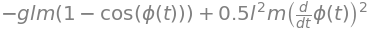

In [11]:
L = 
L

Euler-Lagrange-Gleichung aufstellen
$$\frac{d}{dt}\frac{\partial L}{\partial \phi'(t)} - \frac{\partial L}{\partial \phi(t)} = 0$$

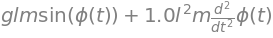

In [12]:
Eq =
Eq

Kleinwinkelnäherung einsetzen (substituieren) für Winkel $\phi < 10°$
$$\sin\phi(t) \approx \phi(t)$$

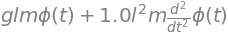

In [13]:
rew = 
Eq1 = 
Eq1

Differenzialgleichung lösen

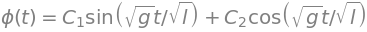

In [17]:
sol = sp.dsolve(Eq1, phi(t))
sol

Abkürzungen einführen und vereinfachen:

$$\omega = \sqrt{\frac{g}{l}}$$

In [15]:
om = sp.Symbol('omega', real=True)
rew = {sp.sqrt(g/le): om}
allg = sol.subs(rew).simplify()

Die allgemeine Lösung lautet:

In [16]:
allg

Rechte Seite der Gleichung (und Ableitung) als Variable anlegen:

In [18]:
phit =
phidt =

Allgmeine Gleichung:

In [19]:
phit

Allgemeine Ableitung:

In [20]:
phidt

Symbole für Konstanten $C_1$ und $C_2$ zum ersetzen erzeugen:

In [21]:
C1, C2 = sp.symbols('C1 C2')

Rand- und Anfangsbedingungen einsetzen:
$$\phi(0) = A$$
$$\phi'(0) = 0$$

Auflösen nach $C_1$ und $C_2$

In [26]:
sc = 
sc

Einsetzen der berechneten Werte für $C_1$ und $C_2$

In [24]:
sol = phit.subs(sc)
final = sp.Eq(phi(t), sol)

Spezielle Lösung lautet

In [25]:
final

Numerische Gleichungen zum Plotten erzeugen

In [27]:
phit_f = 
phidt_f = 
phiddt_f = 

In [44]:
def plotsim(phitf, phidtf, phiddtf, f=1.0, A=1.0, tend=2.0):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
    tvec = np.linspace(0, tend, 100)
    w = 2*np.pi*f

    ax1.plot(tvec, phitf(A, w, tvec), label=r'$\phi(t)$')
    ax2.plot(tvec, phidtf(A, w, tvec), label=r'$\frac{d}{dt}\phi(t)$')
    ax3.plot(tvec, phiddtf(A, w, tvec), label=r'$\frac{d^2}{dt^2}\phi(t)$')

    ax1.set_xlabel('Time in $s$')
    ax2.set_xlabel('Time in $s$')
    ax3.set_xlabel('Time in $s$')
    
    ax1.set_ylabel(r'$\phi(t)$')
    ax2.set_ylabel(r'$\frac{d}{dt}\phi(t)$')
    ax3.set_ylabel(r'$\frac{d^2}{dt^2}\phi(t)$')
    fig.tight_layout()

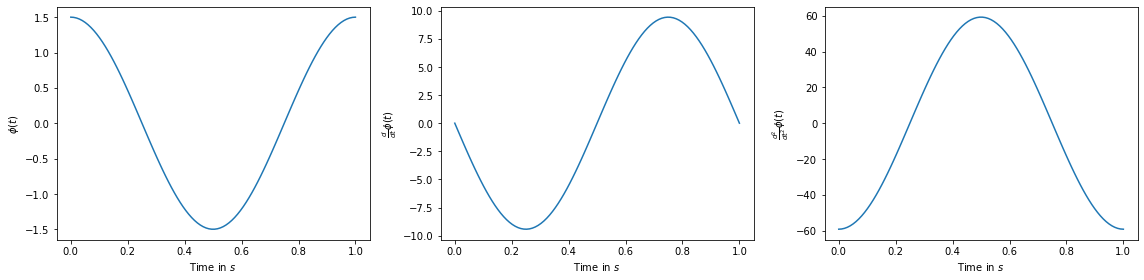

In [45]:
plotsim(phit_f, phidt_f, phiddt_f, 1.0, 1.5, 1.0);